In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import datetime as dt
import calendar

In [5]:
df = pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df.duplicated().sum()

27

In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

<Axes: >

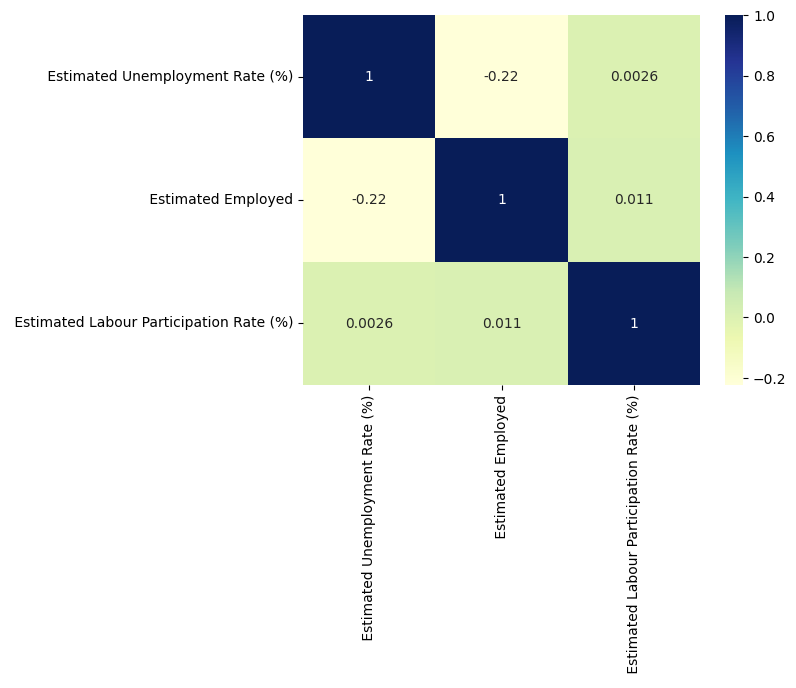

In [11]:
sns.heatmap(df[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].corr(),cmap="YlGnBu",annot=True)

In [13]:
Region = df.groupby(['Region'])[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].mean()
Region = pd.DataFrame(Region).reset_index()

In [14]:
fig = px.bar(Region, x='Region', y=' Estimated Unemployment Rate (%)', color='Region', title='Average unemploment Rate (Region)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [15]:
Employed = df[' Estimated Employed'].iloc[:50]
Unemployed = df[' Estimated Unemployment Rate (%)'].iloc[:50]

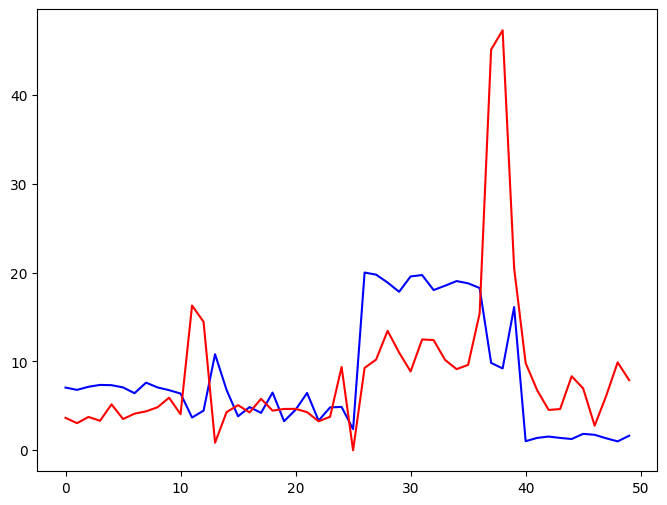

In [16]:
Employed = (Employed - Employed.min())/(Employed.max() - Employed.min()) * 19 + 1

plt.figure(figsize=(8,6))
plt.plot(Employed, label='Employed', color='blue')
plt.plot(Unemployed, label='Unemployed', color='red')
plt.show()

In [17]:
df.Region.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [19]:
df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)
df['month_int'] =  df[' Date'].dt.month.apply(lambda x:  str(x)[:1])
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


In [20]:
IND =  df.groupby(["month_int"])[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].mean()
IND = pd.DataFrame(IND).reset_index()

In [21]:
month = IND.month_int
unemployment_rate = IND[' Estimated Unemployment Rate (%)']
labour_participation_rate = IND[' Estimated Labour Participation Rate (%)']
fig = go.Figure()
fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))
fig.update_layout(title="Uneployment Rate and Labour Participation Rate")
fig.show()


In [22]:
fig = px.bar(IND, x='month_int',y=' Estimated Employed', color='month_int',title='estimated employed people from Jan 2020 to Oct 2020')
fig.show()

In [23]:
df = df.drop([' Estimated Employed'], axis=1)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),Area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,44.68,Rural,9


In [24]:
group = df.groupby(['Region','Area']).agg({' Estimated Unemployment Rate (%)': 'mean'})
group

Estimated Unemployment Rate (%)
Region           Area                                   
Andhra Pradesh   Rural                          5.526429
                 Urban                          9.427857
Assam            Rural                          4.490833
                 Urban                          8.088571
Bihar            Rural                         16.770000
                 Urban                         21.066429
Chandigarh       Urban                         15.991667
Chhattisgarh     Rural                          6.628571
                 Urban                         11.852143
Delhi            Rural                         15.258571
                 Urban                         17.732143
Goa              Rural                          8.390000
                 Urban                         10.158333
Gujarat          Rural                          5.917143
                 Urban                          7.410714
Haryana          Rural                         25.012857
                 Urban                         27.553571
Himachal Pradesh Rural                         15.504286
                 Urban                         21.576429
Jammu & Kashmir  Rural                         14.951818
                 Urban                         17.549000
Jharkhand        Rural                         15.221429
                 Urban                         25.948571
Karnataka        Rural                          7.224286
                 Urban                          6.127857
Kerala           Rural                         10.341429
                 Urban                          9.906429
Madhya Pradesh   Rural                          5.653571
                 Urban                          9.159286
Maharashtra      Rural                          6.810000
                 Urban                          8.305000
Meghalaya        Rural                          2.475000
                 Urban                          7.301538
Odisha           Rural                          6.612857
                 Urban                          4.702857
Puducherry       Rural                          7.263333
                 Urban                         12.745000
Punjab           Rural                         11.925000
                 Urban                         12.137143
Rajasthan        Rural                         10.927143
                 Urban                         17.189286
Sikkim           Rural                          5.080000
                 Urban                          8.153333
Tamil Nadu       Rural                          8.775714
                 Urban                          9.792857
Telangana        Rural                          7.863571
                 Urban                          7.612143
Tripura          Rural                         27.166429
                 Urban                         29.534286
Uttar Pradesh    Rural                         10.208571
                 Urban                         14.894286
Uttarakhand      Rural                          4.882308
                 Urban                          8.162143
West Bengal      Rural                          7.572143
                 Urban                          8.677143